In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df=pd.read_csv('Combined_Ozone.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

In [5]:
# Selecting the column for ARIMA modeling
time_series = df['Daily Max 8-hour Ozone Concentration']

In [6]:
# Step 2: Train-test split (80% training, 20% testing)
split_ratio = 0.8
split_index = int(len(time_series) * split_ratio)
train, test = time_series[:split_index], time_series[split_index:]

In [7]:
# Step 3: Check stationarity using the Augmented Dickey-Fuller (ADF) test
adf_test = adfuller(train.dropna())

In [8]:
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

ADF Test Statistic: -4.9081517960958525
p-value: 3.3622334876389576e-05
Critical Values: {'1%': -3.433776533560336, '5%': -2.8630536193396248, '10%': -2.5675757927320992}


C:\Users\MIHIR SHAH\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


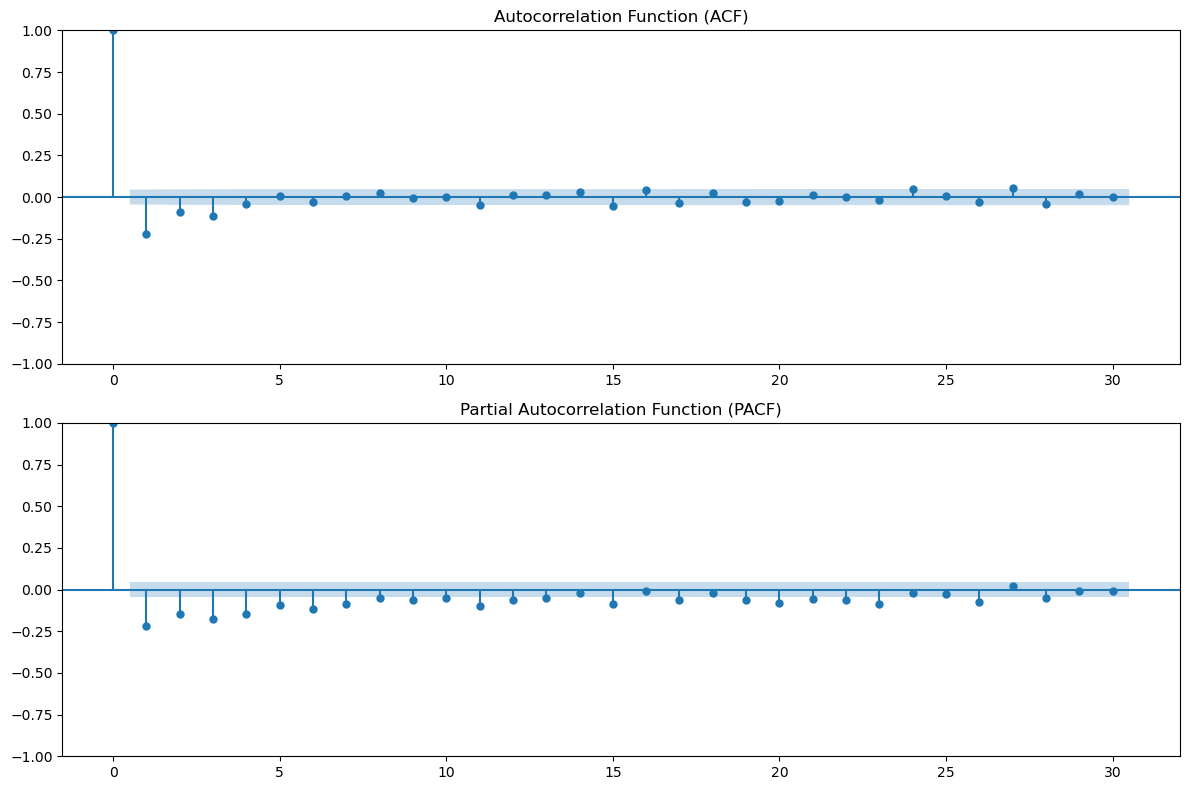

In [9]:
# Step 4: Plot ACF and PACF to determine ARIMA parameters
train_diff = train.diff().dropna()  # Differenced series for non-stationary data
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_diff, ax=ax[0], lags=30, title="Autocorrelation Function (ACF)")
plot_pacf(train_diff, ax=ax[1], lags=30, title="Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()

In [19]:
# Step 5: Train ARIMA model on training data
p, d, q = 2, 1, 1  # Example: Differencing order (d=1)
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

C:\Users\MIHIR SHAH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MIHIR SHAH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MIHIR SHAH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MIHIR SHAH\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MIHIR SHAH\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invert

In [20]:
# Display model summary
print(model_fit.summary())

                                        SARIMAX Results                                         
Dep. Variable:     Daily Max 8-hour Ozone Concentration   No. Observations:                 1938
Model:                                   ARIMA(2, 1, 1)   Log Likelihood                6766.123
Date:                                  Wed, 05 Feb 2025   AIC                         -13524.245
Time:                                          12:05:31   BIC                         -13501.970
Sample:                                      03-01-2018   HQIC                        -13516.053
                                           - 06-20-2023                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5691      0.023     25.069      0.000       0.525

In [21]:
# Step 6: Forecast for test set period
forecast_result = model_fit.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

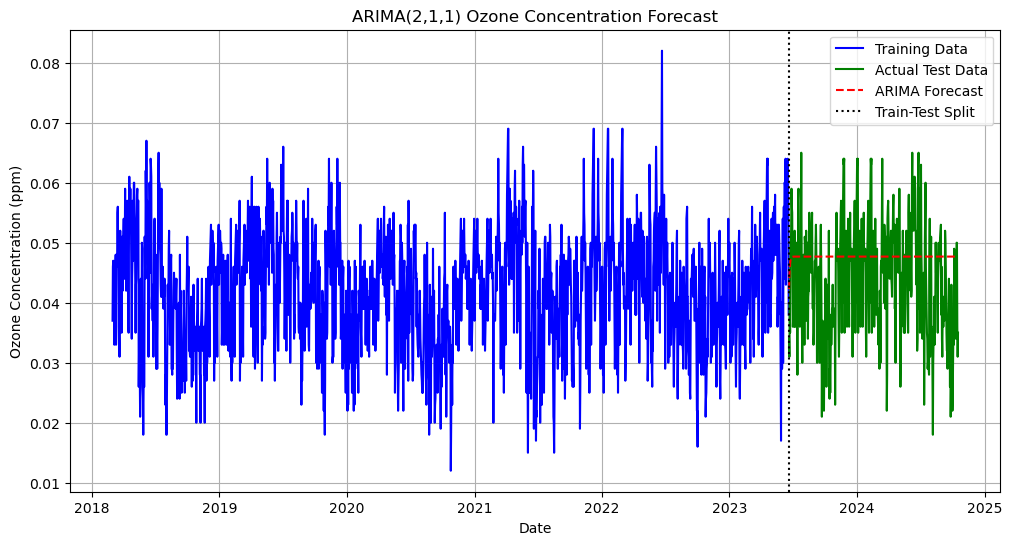

In [26]:
# Step 8: Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data", color="blue")
plt.plot(test, label="Actual Test Data", color="green")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="red", linestyle="dashed")
plt.axvline(test.index[0], color="black", linestyle="dotted", label="Train-Test Split")
plt.title("ARIMA(2,1,1) Ozone Concentration Forecast")
plt.xlabel("Date")
plt.ylabel("Ozone Concentration (ppm)")
plt.legend()
plt.grid()
plt.show()